# LIMPIEZA 3 18/8

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/pair2_bank_additional_full.csv", index_col = 0)

1. ¿Sobre qué columnas podremos eliminar o reemplazar los outliers?

In [3]:
df_numericas = df.select_dtypes(include=np.number)

In [4]:
df_numericas.head(2)

,index,age,default,housing,loan,duration,campaign,pdays,previous,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed"
0,0,56.0,0.0,0.0,0.0,261,1.0,999,0,NaN,93.994,-36.4,4.857,5191.0
1,1,NaN,NaN,0.0,NaN,149,1.0,999,0,NaN,93.994,-36.4,4.857,5191.0


2. Identifica visualmente los outliers

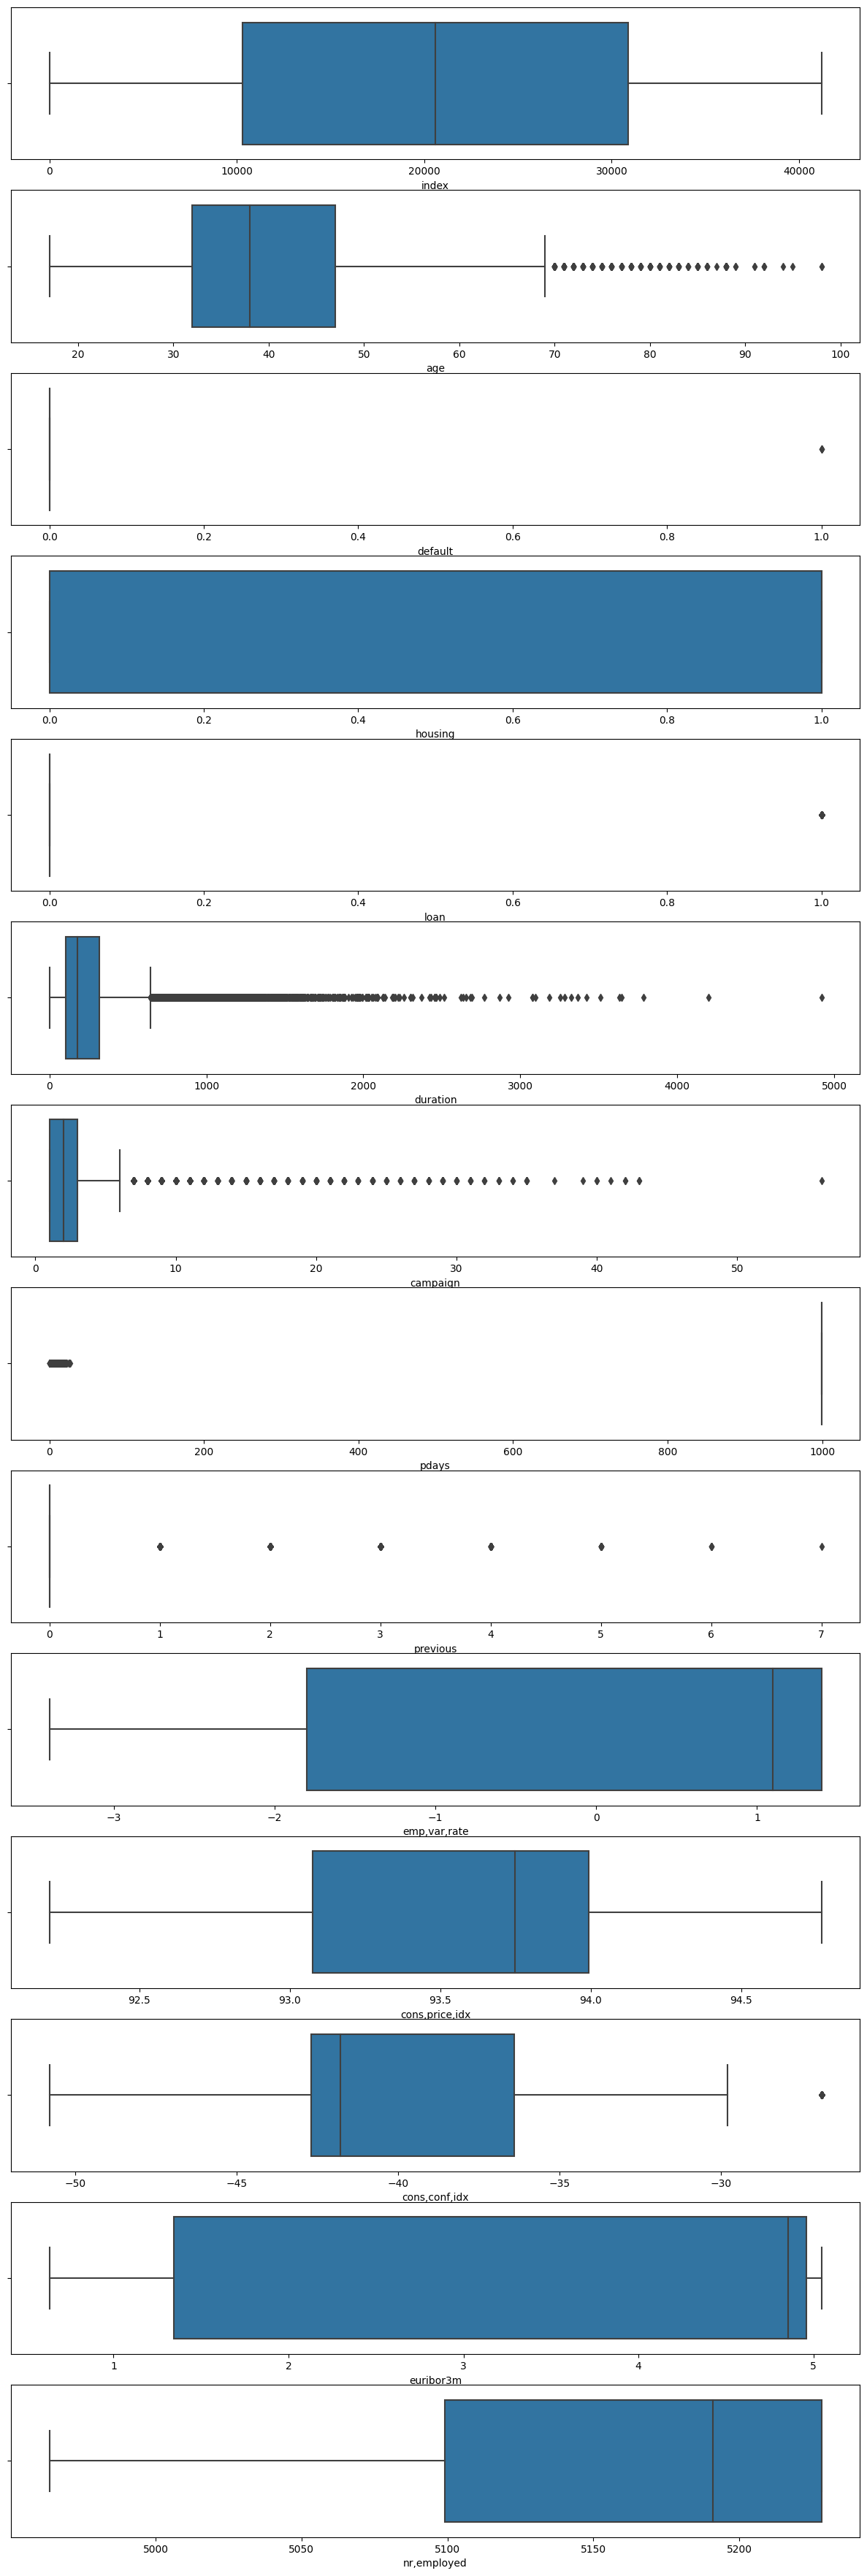

In [5]:
fig, ax = plt.subplots(14, 1, figsize=(15,45))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

3. Identifica sobre el dataframe las filas que son outliers

In [6]:
def detec_outliers(list_col, dataframe):
    dicc_indices = {}
    for col in list_col:
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        IQR = Q3 - Q1
        distancia_outliers = IQR * 1.5
        outliers_data = dataframe[(dataframe[col]<Q1 - distancia_outliers) | (dataframe[col] > Q3 + distancia_outliers)]
        if outliers_data.shape[0] > 0:
            dicc_indices[col] = (list(outliers_data.index))
    return dicc_indices

In [7]:
lista_columnas = list(df_numericas.columns)
lista_columnas

['index',
 'age',
 'default',
 'housing',
 'loan',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp,var,rate',
 'cons,price,idx',
 'cons,conf,idx',
 'euribor3m',
 'nr,employed']

In [8]:
indices = detec_outliers(lista_columnas, df)

In [9]:
for k, v in indices.items():
    print(k,v)

age [27712, 27756, 27779, 27799, 27801, 27807, 27810, 27812, 27813, 27814, 27815, 27816, 27817, 27825, 27836, 27843, 27878, 27901, 27929, 27949, 27950, 28219, 28220, 28311, 28455, 28503, 28529, 28539, 28585, 28618, 28731, 28772, 29224, 29262, 29624, 29667, 29681, 29972, 29976, 29980, 29986, 29989, 29999, 30003, 30005, 30077, 30087, 30102, 30109, 30132, 30170, 30213, 30224, 30226, 30240, 30334, 30389, 30429, 30459, 30588, 35846, 35854, 35971, 36181, 36283, 36309, 36381, 36382, 36814, 36996, 37134, 37168, 37184, 37188, 37190, 37193, 37204, 37205, 37211, 37217, 37225, 37233, 37235, 37237, 37255, 37258, 37314, 37339, 37353, 37369, 37401, 37452, 37453, 37470, 37477, 37491, 37503, 37507, 37510, 37523, 37530, 37543, 37566, 37568, 37584, 37599, 37600, 37602, 37633, 37659, 37673, 37677, 37688, 37690, 37713, 37714, 37733, 37734, 37741, 37754, 37763, 37767, 37773, 37782, 37816, 37817, 37818, 37823, 37824, 37866, 37868, 37871, 37903, 37933, 37944, 37949, 37950, 37952, 37956, 37995, 37997, 38003, 3

4. Reemplaza los outliers por el estadístico más correcto.

In [10]:
df2 = df
dicc_mediana = {}
for k, v in indices.items():
    mediana = df2[k].median()
    dicc_mediana[k] = mediana
    for i in v:
        df2.loc[i,k] = mediana
df_num2 = df2.select_dtypes(include = np.number)
print(dicc_mediana)

{'age': 38.0, 'default': 0.0, 'loan': 0.0, 'duration': 180.0, 'campaign': 2.0, 'pdays': 999.0, 'previous': 0.0, 'cons,conf,idx': -41.8}


In [11]:
# Comprobamos si todos los cambios se han efectuado correctamente.
# 1. Recorremos el diccionario creado anteriormente donde guardamos los valores de la mediana para cada columna (for k, v in dicc_mediana.items())
# 2. Comprobamos la media de cada columna analizada en los índices afectados (df_num2[k].iloc[indices[k]].mean()) y comprobamos si su valor es igual a la mediana generada anteriormente (v)
for k, v in dicc_mediana.items():
    print(f"'{k}' valor correcto: {df_num2[k].iloc[indices[k]].mean() == v}")

'age' valor correcto: True
'default' valor correcto: True
'loan' valor correcto: True
'duration' valor correcto: True
'campaign' valor correcto: True
'pdays' valor correcto: True
'previous' valor correcto: True
'cons,conf,idx' valor correcto: False


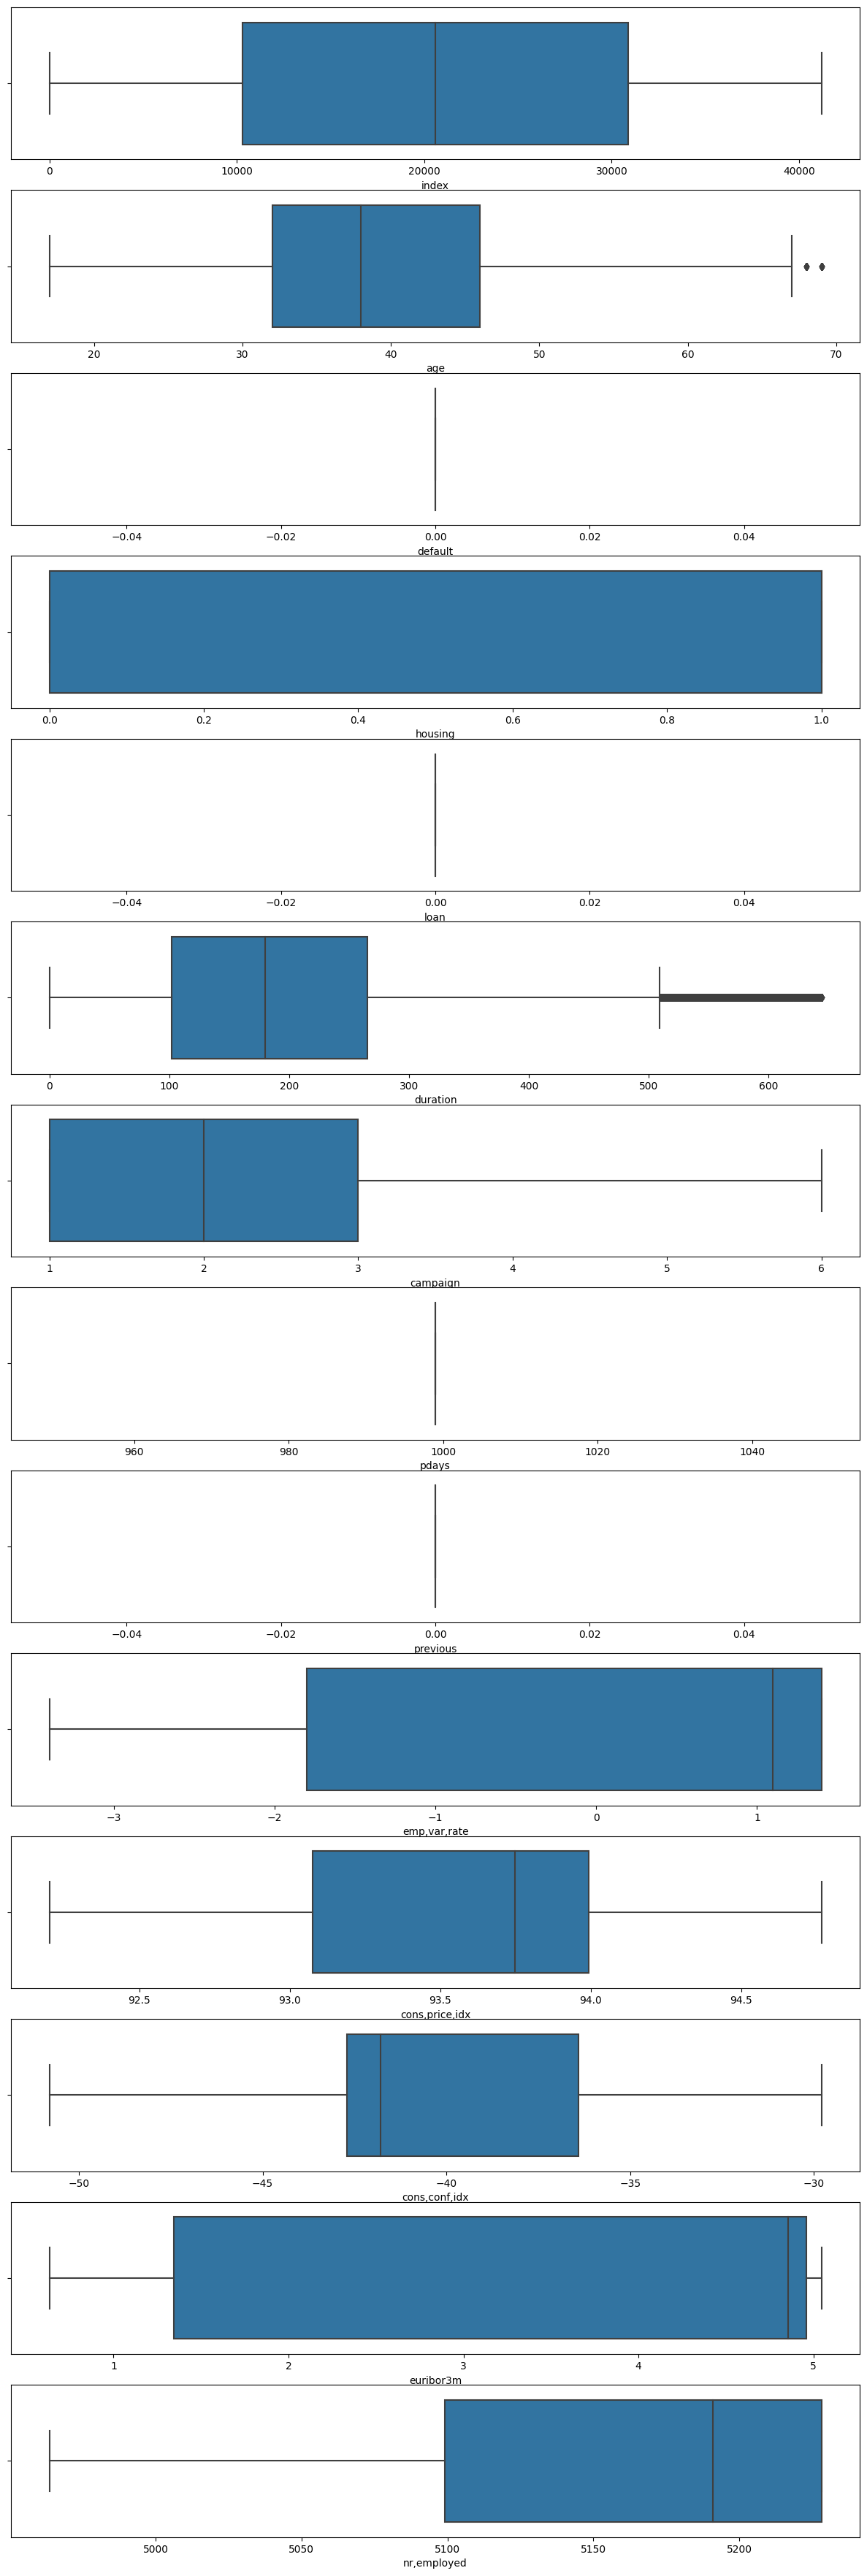

In [12]:
fig, ax = plt.subplots(14, 1, figsize=(15,45))

for i in range(len(df_num2.columns)):
    sns.boxplot(x=df_num2.columns[i], data=df_num2, ax=ax[i])
plt.show()

5. Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza.

In [13]:
df.to_csv("data/pair3_bank_additional_full.csv")